#### Experiment: 

Evaluate pruning by magnitude weighted by coactivations (more thorough evaluation), compare it to baseline (SET).

#### Motivation.

Check if results are consistently above baseline.

#### Conclusion

- No significant difference between both models
- No support for early stopping

In [44]:
from IPython.display import Markdown, display
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import glob
import tabulate
import pprint
import click
import numpy as np
import pandas as pd
from ray.tune.commands import *
from nupic.research.frameworks.dynamic_sparse.common.browser import *

import matplotlib.pyplot as plt
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("colorblind")

## Load and check data

In [46]:
base = os.path.join('gsc-smalldense-2019-10-11-exp1')
exps = [
    os.path.join(base, exp) for exp in [
        'gsc-smalldense'
    ]
]
paths = [os.path.expanduser("~/nta/results/{}".format(e)) for e in exps]
df = load_many(paths)

gsc-smalldense


In [51]:
df

,Experiment Name,train_acc_max,train_acc_max_epoch,train_acc_min,train_acc_min_epoch,train_acc_median,train_acc_last,val_acc_max,val_acc_max_epoch,val_acc_min,...,lr_gamma,lr_milestones,lr_scheduler,model,momentum,net_params,network,optim_alg,test_noise,weight_decay
0,"0_equivalent_on_perc=0.02,model=BaseModel",0.722293,92,0.256079,0,0.705961,0.714383,0.792712,45,0.286050,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
1,"1_equivalent_on_perc=0.04,model=BaseModel",0.836149,92,0.224685,0,0.826238,0.831169,0.905172,65,0.305643,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
2,"2_equivalent_on_perc=0.06,model=BaseModel",0.874426,65,0.288595,0,0.864466,0.870813,0.936912,78,0.447492,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
3,"3_equivalent_on_perc=0.08,model=BaseModel",0.894200,92,0.300410,0,0.880163,0.891710,0.942006,78,0.298197,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
4,"4_equivalent_on_perc=0.1,model=BaseModel",0.894737,96,0.327995,0,0.887194,0.890831,0.949451,55,0.486677,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
5,"5_equivalent_on_perc=0.02,model=BaseModel",0.714481,92,0.169905,0,0.698662,0.707450,0.781740,85,0.137539,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
6,"6_equivalent_on_perc=0.04,model=BaseModel",0.836588,98,0.231081,0,0.824187,0.830876,0.907132,98,0.296630,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
7,"7_equivalent_on_perc=0.06,model=BaseModel",0.872913,93,0.251343,0,0.862465,0.869544,0.928292,46,0.378918,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
8,"8_equivalent_on_perc=0.08,model=BaseModel",0.895030,91,0.317547,0,0.882873,0.894444,0.943182,45,0.528997,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01
9,"9_equivalent_on_perc=0.1,model=BaseModel",0.901767,96,0.305146,0,0.890562,0.890196,0.949451,32,0.391066,...,0.9,60.0,MultiStepLR,BaseModel,0,"{'boost_strength': 1.5, 'boost_strength_factor...",small_dense_gsc,SGD,False,0.01


In [52]:
df.columns

Index(['Experiment Name', 'train_acc_max', 'train_acc_max_epoch',
       'train_acc_min', 'train_acc_min_epoch', 'train_acc_median',
       'train_acc_last', 'val_acc_max', 'val_acc_max_epoch', 'val_acc_min',
       'val_acc_min_epoch', 'val_acc_median', 'val_acc_last', 'val_acc_all',
       'epochs', 'experiment_file_name', 'experiment_base_path', 'trial_time',
       'mean_epoch_time', 'scatter_plot_dicts', 'batch_size_test',
       'batch_size_train', 'data_dir', 'dataset_name', 'debug_small_dense',
       'debug_sparse', 'debug_weights', 'device', 'equivalent_on_perc',
       'learning_rate', 'lr_gamma', 'lr_milestones', 'lr_scheduler', 'model',
       'momentum', 'net_params', 'network', 'optim_alg', 'test_noise',
       'weight_decay'],
      dtype='object')

In [53]:
df.shape

(40, 40)

In [54]:
df.iloc[1]

Experiment Name                 1_equivalent_on_perc=0.04,model=BaseModel
train_acc_max                                                    0.836149
train_acc_max_epoch                                                    92
train_acc_min                                                    0.224685
train_acc_min_epoch                                                     0
train_acc_median                                                 0.826238
train_acc_last                                                   0.831169
val_acc_max                                                      0.905172
val_acc_max_epoch                                                      65
val_acc_min                                                      0.305643
val_acc_min_epoch                                                       0
val_acc_median                                                   0.881661
val_acc_last                                                      0.88127
val_acc_all             0     0.305643

In [56]:
df.groupby('equivalent_on_perc')['equivalent_on_perc'].count()

equivalent_on_perc
0.02    8
0.04    8
0.06    8
0.08    8
0.10    8
Name: equivalent_on_perc, dtype: int64

 ## Analysis

Experiment Details

In [57]:
# Did any  trials failed?
df[df["epochs"]<100]["epochs"].count()

0

In [58]:
# Removing failed or incomplete trials
df_origin = df.copy()
df = df_origin[df_origin["epochs"]>=30]
df.shape

(40, 40)

In [59]:
# which ones failed?
# failed, or still ongoing?
df_origin['failed'] = df_origin["epochs"]<30
df_origin[df_origin['failed']]['epochs']

Series([], Name: epochs, dtype: int64)

In [60]:
# helper functions
def mean_and_std(s):
    return "{:.3f} ± {:.3f}".format(s.mean(), s.std())

def round_mean(s):
    return "{:.0f}".format(round(s.mean()))

stats = ['min', 'max', 'mean', 'std']

def agg(columns, filter=None, round=3):
    if filter is None:
        return (df.groupby(columns)
             .agg({'val_acc_max_epoch': round_mean,
                   'val_acc_max': stats,                
                   'model': ['count']})).round(round)
    else:
        return (df[filter].groupby(columns)
             .agg({'val_acc_max_epoch': round_mean,
                   'val_acc_max': stats,                
                   'model': ['count']})).round(round)


##### Does improved weight pruning outperforms regular SET

In [108]:
df_agg = agg(['equivalent_on_perc'])
df_agg

val_acc_max_epoch val_acc_max                      model
                          round_mean         min    max   mean    std count
equivalent_on_perc                                                         
0.02                              65       0.782  0.793  0.788  0.005     8
0.04                              80       0.905  0.914  0.909  0.003     8
0.06                              70       0.928  0.937  0.931  0.004     8
0.08                              69       0.939  0.948  0.944  0.003     8
0.10                              72       0.947  0.951  0.950  0.001     8

In [109]:
equivalent_on_percs = df_agg.index.values

val_means = df_agg['val_acc_max']['mean']
val_means = np.array(val_means)
val_stds = df_agg['val_acc_max']['std']
val_stds = np.array(val_stds)

In [110]:
print(equivalent_on_percs)
print(val_means)
print(val_stds)

[0.02 0.04 0.06 0.08 0.1 ]
[0.788 0.909 0.931 0.944 0.95 ]
[0.005 0.003 0.004 0.003 0.001]


In [39]:
# translate model names
rcParams['figure.figsize'] = 16, 8
# d = {
#     'DSNNWeightedMag': 'DSNN',
#     'DSNNMixedHeb': 'SET',
#     'SparseModel': 'Static',        
# }
# df_plot = df.copy()
# df_plot['model'] = df_plot['model'].apply(lambda x, i: model_name(x, i))

<ErrorbarContainer object of 3 artists>

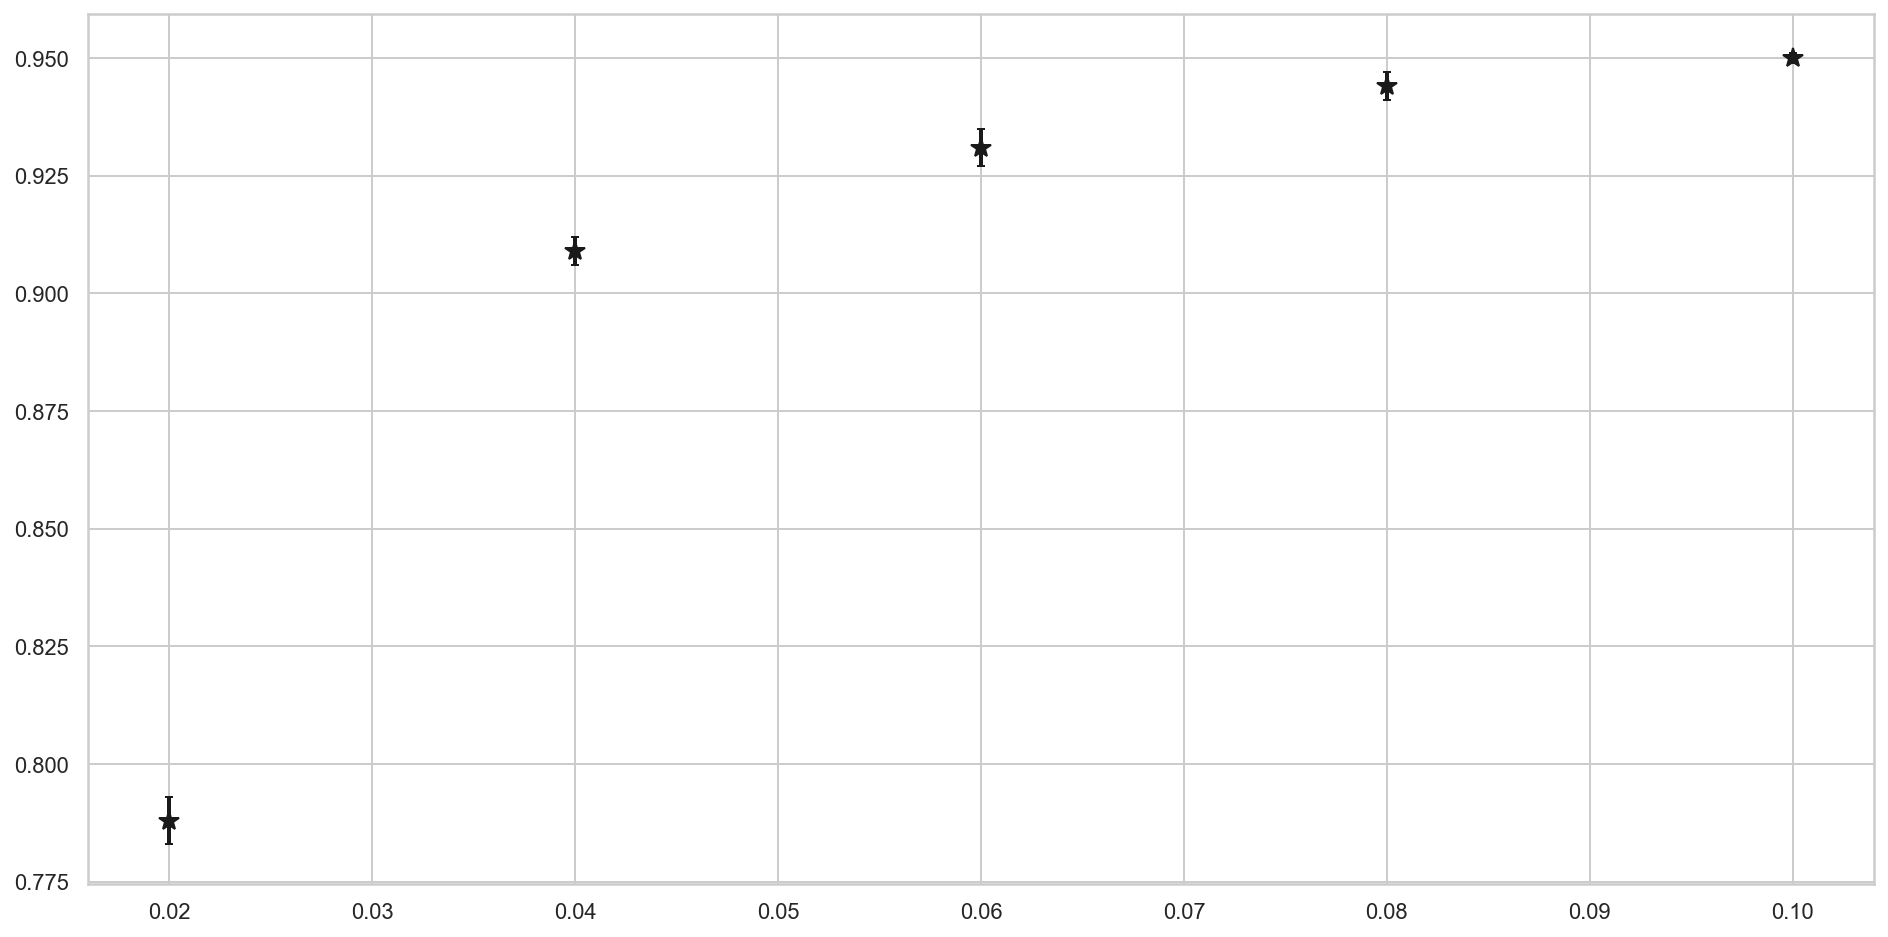

In [117]:
plt.errorbar(
    x=equivalent_on_percs,
    y=val_means,
    yerr=val_stds,
    color='k',
    marker='*',
    lw=0,
    elinewidth=2,
    capsize=2,
    markersize=10,
    label="Small-Dense Equivalents"
)
# sns.scatterplot(data=df_plot, x='on_perc', y='val_acc_max', hue='model')
# sns.lineplot(data=df, x='equivalent_on_perc', y='val_acc_max', hue='equivalent_on_perc')